# Zadanie 1

### Dokonaj klasteryzacji danych z pliku z użyciem KMeans i DBSCAN:
    
    a) Wyłącz ze zbioru kolumny A i B
    b) Znajdź optymalną liczbę K dla algorytmu K Means.
    c) Oblicz średnie zmiennych dla każdego klastra wg DBSCAN i KMeans

In [5]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('datasets/trumptweets_data.csv', sep=';', decimal=",")
df.head()

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Be sure to tune in and watch Donald Trump on L...,NaN,23,98.23,66.81,54.89,93.61,23.0,13.04,73.91,...,0.0,0.00,0.0,0.0,4.35,0.0,0.0,0.0,0.0,0.00
1,Donald Trump will be appearing on The View tom...,NaN,22,96.54,81.84,31.94,94.75,22.0,31.82,90.91,...,0.0,0.00,0.0,0.0,4.55,0.0,0.0,0.0,0.0,0.00
2,Donald Trump reads Top Ten Financial Tips on L...,NaN,20,96.79,50.00,15.86,96.76,20.0,15.00,50.00,...,0.0,5.00,0.0,0.0,5.00,5.0,0.0,0.0,0.0,10.00
3,New Blog Post: Celebrity Apprentice Finale and...,NaN,17,97.21,50.00,99.00,25.77,17.0,29.41,76.47,...,0.0,11.76,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.76
4,"""My persona will never be that of a wallflower...",NaN,20,25.89,2.31,74.76,25.77,10.0,10.00,65.00,...,0.0,0.00,0.0,0.0,0.00,15.0,10.0,5.0,0.0,0.00


Konieczna jest zmiana typu danych z object na wartości numeryczne:

In [7]:
df = df.drop(['A', 'B'], axis=1)
df.apply(pd.to_numeric)
df.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,23,98.23,66.81,54.89,93.61,23.0,13.04,73.91,39.13,4.35,...,0.0,0.00,0.0,0.0,4.35,0.0,0.0,0.0,0.0,0.00
1,22,96.54,81.84,31.94,94.75,22.0,31.82,90.91,40.91,4.55,...,0.0,0.00,0.0,0.0,4.55,0.0,0.0,0.0,0.0,0.00
2,20,96.79,50.00,15.86,96.76,20.0,15.00,50.00,15.00,0.00,...,0.0,5.00,0.0,0.0,5.00,5.0,0.0,0.0,0.0,10.00
3,17,97.21,50.00,99.00,25.77,17.0,29.41,76.47,17.65,0.00,...,0.0,11.76,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.76
4,20,25.89,2.31,74.76,25.77,10.0,10.00,65.00,60.00,20.00,...,0.0,0.00,0.0,0.0,0.00,15.0,10.0,5.0,0.0,0.00


## Algorytm K-Means

[[2, 307075644.72451556], [3, 246706575.4256183], [4, 218237107.94165838], [5, 199556185.12446028], [6, 184460908.97886243], [7, 171703042.17188936], [8, 161605623.7801354], [9, 152682694.1220069], [10, 148023556.2308538], [11, 143593659.34964508], [12, 140195975.41897297], [13, 136889147.37361452]]


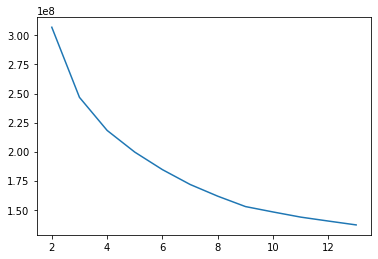

In [8]:
inertias = []
for k in range(2,14):
    km = KMeans(n_clusters = k, random_state=0)
    km.fit(df)
    inertias.append([k,km.inertia_])
print(inertias)

plt.plot([k[0] for k in inertias],[k[1] for k in inertias])
plt.show()

Wartością optymalną wydaje się być k = 9 (Metoda łokciowa)

### Średnie zmiennych dla każdego klastra w K-Means

In [5]:
km = KMeans(n_clusters = 9)
km.fit(df)
pd.DataFrame(km.cluster_centers_,columns = df.keys())

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,21.652467,74.124635,47.248435,81.454277,18.126647,12.387748,22.595510,75.319057,41.778068,8.516826,...,3.031647,1.569776,0.0,0.559028,3.137512,2.335129,3.456527,2.081227e+00,5.223851e-01,8.603035
1,14.290619,83.948634,74.578136,7.500943,97.908752,9.497244,35.032945,53.606608,17.137913,5.519824,...,2.089681,4.179492,0.0,0.326724,10.437512,4.008607,8.213298,1.062014e+00,1.678337e-01,32.380348
2,24.745106,86.217385,73.879821,13.416293,95.614949,12.963621,23.456202,74.353538,39.597000,8.175144,...,2.912493,1.289625,0.0,0.276878,2.986679,1.515595,3.194837,1.097957e+00,4.065779e-01,8.201321
3,1.142974,93.153317,50.113137,1.303938,26.069142,1.118464,3.546552,0.925784,0.168922,0.043121,...,0.065359,1.129984,0.0,95.364526,1.434534,0.040850,2.221471,6.883383e-15,-1.276756e-15,99.493407
4,22.207033,73.053179,51.884401,79.558059,95.766409,11.530198,22.762087,78.839282,41.325341,9.223697,...,3.067568,1.724761,0.0,0.237561,4.453200,1.959625,3.688294,1.680210e+00,4.386683e-01,8.087283
5,19.848347,26.035829,74.983656,15.000292,97.066470,10.328468,22.527193,78.785350,47.196670,16.819642,...,3.108757,2.657339,0.0,0.610271,5.313792,1.809013,6.208734,2.595961e+00,3.384515e-01,11.511888
6,22.065832,24.653722,66.921892,17.294691,14.972516,11.609314,22.083484,78.019847,49.776068,15.795762,...,3.168305,1.970305,0.0,1.278310,3.319605,1.908446,4.867962,3.108521e+00,6.052591e-01,8.567019
7,16.161996,88.696770,68.982043,10.059661,21.939607,12.514821,35.795882,45.780061,15.838230,3.177434,...,1.593574,4.345782,0.0,0.596819,3.798606,5.647549,8.017883,1.695243e+00,2.283530e-01,31.910971
8,25.217287,84.173944,68.037344,12.718933,13.645401,14.170198,23.130413,73.031285,41.227281,7.941886,...,2.937538,0.958987,0.0,0.499383,2.278231,1.560006,2.687126,1.469319e+00,6.836900e-01,6.885912


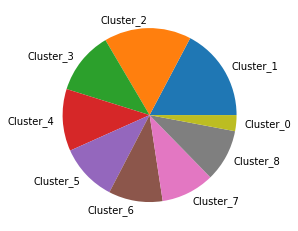

In [6]:
plt.pie(pd.Series(km.labels_).value_counts(), labels = ["Cluster_1","Cluster_2","Cluster_3","Cluster_4","Cluster_5","Cluster_6","Cluster_7","Cluster_8","Cluster_0"]);

## Algorytm DBSCAN

In [7]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(df)

n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_clusters

22

In [11]:
average_values = []

df['cluster'] = db.labels_

df['cluster'].unique()
for i in range(-1, n_clusters):
    tmp_df = df[df['cluster'] == i]
    average_values.append(tmp_df.mean())

means = pd.DataFrame(average_values)
means.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,cluster
0,21.669682,69.853724,65.780759,29.32774,57.406659,12.226199,25.079493,70.881102,37.989762,9.333791,...,2.220636,0.0,0.531885,4.008331,2.466682,4.858694,1.799449,0.447266,13.077077,-1.0
1,1.000000,93.260000,50.000000,1.00000,25.770000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.0
2,2.000000,93.260000,50.000000,1.00000,99.000000,2.000000,50.000000,50.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.0
3,3.000000,93.260000,50.000000,98.01000,99.000000,3.000000,66.670000,66.670000,0.000000,0.000000,...,0.000000,0.0,0.000000,33.330000,0.000000,0.000000,0.000000,0.000000,33.330000,2.0
4,2.000000,93.260000,50.000000,1.00000,99.000000,2.000000,50.000000,50.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.0
